In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy
import seaborn as sns
import glob

In [4]:
def diff(pos,neg,feature_name):
    tmp = scipy.stats.mannwhitneyu(pos,neg).pvalue
    return -np.log10(tmp)
def parse_csv(x):
    df = pd.read_csv(x,index_col=0)
    df.columns = ["-".join(x.split("-")[1:]) for x in df.columns ]
    return df

In [5]:
out = {}
for i in [5,10,20,30,40,50,60,70,80,90,100]:
    current = {}
    i = str(i)
    pos = glob.glob("pos*%s.average.csv.csv"%(i))[0]
    neg = glob.glob("neg*%s.average.csv.csv"%(i))[0] 
    pos = parse_csv(pos)
    neg = parse_csv(neg)
    for c in pos.columns:
        current[c] = diff(pos[c].tolist(),neg[c].tolist(),c)
    out[i] = current
    

In [11]:
df = pd.DataFrame(out).T
for c in df:
    df[c] = (df[c] - df[c].mean())/df[c].std()

In [14]:
df = pd.DataFrame(out)
df

,5,10,20,30,40,50,60,70,80,90,100
HUDEP2_LRF_CHIP,7.209605,7.264891,7.308035,7.348262,7.335490,7.350818,7.377977,7.411113,7.397100,7.353373,7.340990
Hudep2_ATAC,13.029096,12.995758,12.914656,12.866139,12.875144,12.875939,12.889454,12.855018,12.773623,12.714335,12.671737
Hudep2_BCL11A,4.694559,4.712664,4.672576,4.599857,4.594976,4.647181,4.710505,4.771507,4.816058,4.858322,4.932228
Hudep2_D0_GATA1.all,1.895856,1.913972,1.937776,1.956918,1.959635,1.974480,1.981078,1.996681,2.020841,2.034996,2.071510
Hudep2_D3_merged_CTCF.all,8.233110,8.226371,8.082628,8.002937,8.025795,8.084861,8.173270,8.209529,8.207025,8.224140,8.284822
Hudep2_D3_merged_GATA1.all,3.307394,3.289219,3.257279,3.245222,3.233078,3.252996,3.240210,3.223082,3.212357,3.217343,3.218091
Hudep2_D3_merged_KLF1.all,7.705766,7.739753,7.781117,7.783941,7.821500,7.849988,7.881795,7.886082,7.889349,7.887715,7.884448
Hudep2_D3_merged_LDB1.all,2.918572,2.960764,2.980207,2.959576,2.952681,2.992864,3.009769,3.042410,3.057655,3.082550,3.137723
Hudep2_D3_merged_TAL1.all,6.325219,6.312599,6.242463,6.196934,6.122768,6.064143,6.037598,5.980831,5.914564,5.848699,5.791355


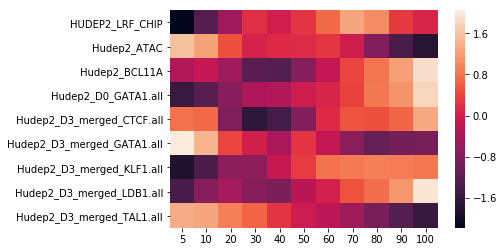

In [13]:
sns.heatmap(df.T)